In [6]:
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the file
file_path = r'C:\Users\bulyn\Documents\GitHub\PAD\lab5\зп_работников.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,experience,salary
0,0.30,25000
1,0.50,18000
2,0.55,33400
3,0.70,22000
4,0.95,38000


In [7]:
data['experience_months'] = (data['experience'] * 12).round().astype(int)

scaler = MinMaxScaler()
data[['normalized_experience', 'normalized_salary']] = scaler.fit_transform(data[['experience_months', 'salary']])

In [8]:
user_experience_months = 50  # from input (1 year and 2 months)
k = 6 # number of neighbors


while True:
    try:
        user_experience_months = int(input("Введите количество месяцев работы"))
        k = int(input("Введите количество ближайших соседей (1-6): "))
        if 1 <= k <= 6:
            break
        else:
            print("Количество ближайших соседей должно быть от 1 до 6.")
    except ValueError:
        print("Неверный ввод. Пожалуйста, введите целые числа.")

Неверный ввод. Пожалуйста, введите целые числа.
Неверный ввод. Пожалуйста, введите целые числа.
Неверный ввод. Пожалуйста, введите целые числа.


In [9]:
data['distance'] = data['experience_months'].apply(lambda x: euclidean([x], [user_experience_months]))
nearest_neighbors = data.nsmallest(k, 'distance')

# Predict salary as the mean of the salaries of the nearest neighbors
predicted_salary = nearest_neighbors['salary'].mean()



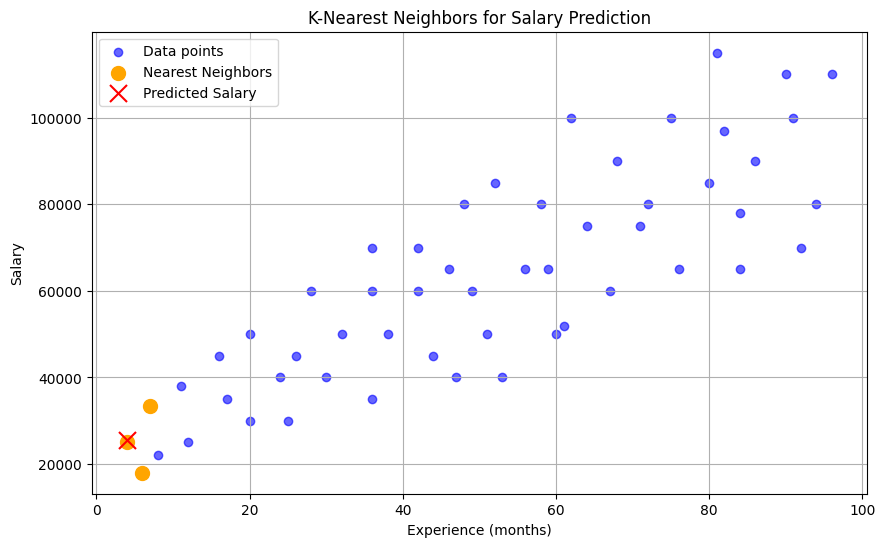

(25466.666666666668,
 'C:\\Users\\bulyn\\Documents\\GitHub\\PAD\\lab5\\нормализация.xlsx')

In [10]:
# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['experience_months'], data['salary'], label='Data points', color='blue', alpha=0.6)
plt.scatter(nearest_neighbors['experience_months'], nearest_neighbors['salary'], color='orange', label='Nearest Neighbors', s=100)
plt.scatter([user_experience_months], [predicted_salary], color='red', label='Predicted Salary', s=150, marker='x')
plt.xlabel('Experience (months)')
plt.ylabel('Salary')
plt.title('K-Nearest Neighbors for Salary Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Save normalized data to a new file
normalized_file_path = r'C:\Users\bulyn\Documents\GitHub\PAD\lab5\нормализация.xlsx'
data[['normalized_experience', 'normalized_salary']].to_excel(normalized_file_path, index=False)

predicted_salary, normalized_file_path

In [26]:
data['ExperienceMonths'] = data['experience'].apply(lambda x: int(x.split()[0]) * 12 + int(x.split()[1]) if isinstance(x, str) else x) #Handles potential issues with missing data in a simple way
data = data.dropna(subset=['ExperienceMonths', 'salary']) #Remove rows with NaN after the conversion
data

,experience,salary,ExperienceMonths
0,0.30,25000,0.30
1,0.50,18000,0.50
2,0.55,33400,0.55
3,0.70,22000,0.70
4,0.95,38000,0.95
5,1.00,25000,1.00
6,1.35,45000,1.35
7,1.40,35000,1.40
8,1.65,50000,1.65
9,1.70,30000,1.70


In [27]:
# 3. User input
while True:
    try:
        experience_years = int(input("Введите год опыта: "))
        experience_months = int(input("Введите месяц опыта: "))
        k = int(input("Введите количество ближайших соседей (1-6): "))
        if 1 <= k <= 6:
            break
        else:
            print("Number of neighbors must be between 1 and 6.")
    except ValueError:
        print("Неверный ввод. Пожалуйста, введите целые числа.")

total_experience_months = experience_years * 12 + experience_months


In [28]:
# 4. Prepare data for k-NN
X = data[['ExperienceMonths']]
y = data['salary']

# 5. Normalize data (for better k-NN performance)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 6. k-NN prediction
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_scaled, y_scaled)

#Scale the user input.
total_experience_months_scaled = scaler_x.transform([[total_experience_months]])

predicted_salary_scaled = knn.predict(total_experience_months_scaled)
predicted_salary = scaler_y.inverse_transform(predicted_salary_scaled)[0][0]


# 7. Find k-nearest neighbors' indices
distances, indices = knn.kneighbors(total_experience_months_scaled)


c:\Users\bulyn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
indices

array([[53, 52]], dtype=int64)

TypeError: 'numpy.ndarray' object is not callable

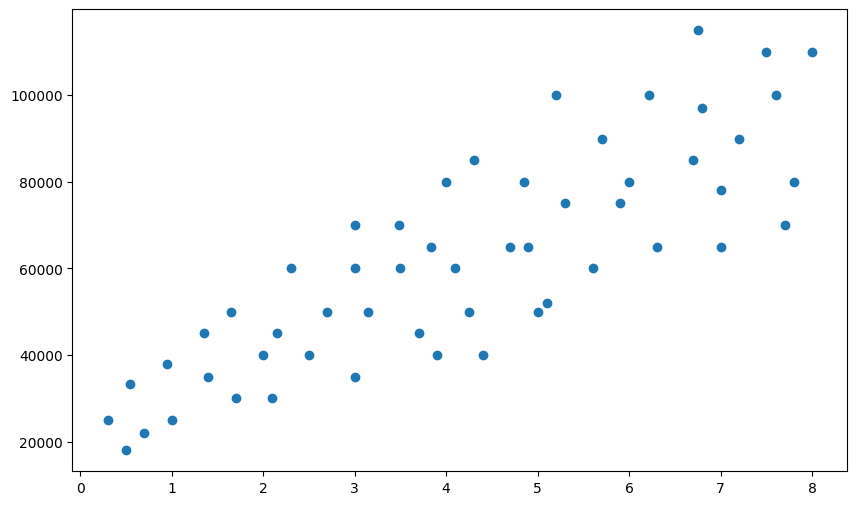

In [31]:

# 8. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points')
plt.scatter(X.iloc[indices.flatten()], y.iloc[indices()], color='red', label=f'{k} Nearest Neighbors')
plt.scatter(total_experience_months, predicted_salary, color='green', marker='x', s=100, label=f'Predicted Salary ({predicted_salary:.2f})')
plt.xlabel('Experience (Months)')
plt.ylabel('Salary')
plt.title(f'k-NN Regression (k={k})')
plt.legend()
plt.show()


#9. Save Normalized Data

normalized_data = pd.DataFrame({
    'ExperienceMonths_normalized': scaler_x.transform(X),
    'Salary_normalized': scaler_y.transform(y.values.reshape(-1, 1))
})
normalized_data.to_csv("normalized_salary_experience.csv", index=False)

print(f"Predicted salary for {experience_years} years and {experience_months} months: {predicted_salary:.2f}")